In [ ]:
# pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:


# X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_y.csv')

X_df = pd.read_csv('@datasets_reproducibity/ili/M/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/ili/M/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,-0.5,-0.333333,-0.500000,-0.500000
1,2002-01-08,-0.5,-0.333333,-0.266667,-0.480822
2,2002-01-15,-0.5,-0.333333,-0.033333,-0.461644
3,2002-01-22,-0.5,-0.333333,0.200000,-0.442466
4,2002-01-29,-0.5,-0.333333,0.433333,-0.423288
...,...,...,...,...,...
961,2020-06-02,-0.5,-0.333333,-0.466667,-0.080822
962,2020-06-09,-0.5,-0.333333,-0.233333,-0.061644
963,2020-06-16,-0.5,-0.333333,0.000000,-0.042466
964,2020-06-23,-0.5,-0.333333,0.233333,-0.023288


In [ ]:
Y_df

,ds,unique_id,y
0,2002-01-01,% WEIGHTED ILI,-0.421499
1,2002-01-01,%UNWEIGHTED ILI,-0.472442
2,2002-01-01,AGE 0-4,-0.981641
3,2002-01-01,AGE 5-24,-0.692621
4,2002-01-01,ILITOTAL,-0.819695
...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263
6758,2020-06-30,AGE 5-24,0.023051
6759,2020-06-30,ILITOTAL,0.651678
6760,2020-06-30,NUM. OF PROVIDERS,3.454565


In [ ]:
a=Y_df['unique_id'].unique()
a.size

7

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,% WEIGHTED ILI,-0.421499,-0.5,-0.333333,-0.500000,-0.50000
1,2002-01-01,%UNWEIGHTED ILI,-0.472442,-0.5,-0.333333,-0.500000,-0.50000
2,2002-01-01,AGE 0-4,-0.981641,-0.5,-0.333333,-0.500000,-0.50000
3,2002-01-01,AGE 5-24,-0.692621,-0.5,-0.333333,-0.500000,-0.50000
4,2002-01-01,ILITOTAL,-0.819695,-0.5,-0.333333,-0.500000,-0.50000
...,...,...,...,...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263,-0.5,-0.333333,0.466667,-0.00411
6758,2020-06-30,AGE 5-24,0.023051,-0.5,-0.333333,0.466667,-0.00411
6759,2020-06-30,ILITOTAL,0.651678,-0.5,-0.333333,0.466667,-0.00411
6760,2020-06-30,NUM. OF PROVIDERS,3.454565,-0.5,-0.333333,0.466667,-0.00411


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.drop("ds",axis=1,inplace=True)
filtered_df['ds'] = range(len(filtered_df))
Y_df=filtered_df
Y_df

/tmp/ipykernel_3292/786084273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("ds",axis=1,inplace=True)
/tmp/ipykernel_3292/786084273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = range(len(filtered_df))


,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


## Horizon 24

In [ ]:
Y_df=filtered_df

In [ ]:
Y_train_df = Y_df.iloc[:942,:]
Y_test_df = Y_df.iloc[942:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,942,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,943,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,944,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,945,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,946,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,947,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,948,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,949,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,950,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,951,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
horizon = 24
model = FEDformer(h=horizon, input_size=24,
               max_steps=10,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 173 K 
7 | decoder       | Decoder       | 214 K 
------------------------------------------------
388 K     Trainable params
0         Non-trainable params
388 K     Total params
1.555     Total

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=10` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,3.856623
OT,1,3.478756
OT,2,3.563902
OT,3,3.643713
OT,4,3.695378
OT,5,3.889370
OT,6,3.723527
OT,7,3.486768
OT,8,3.371554


<Axes: xlabel='ds'>

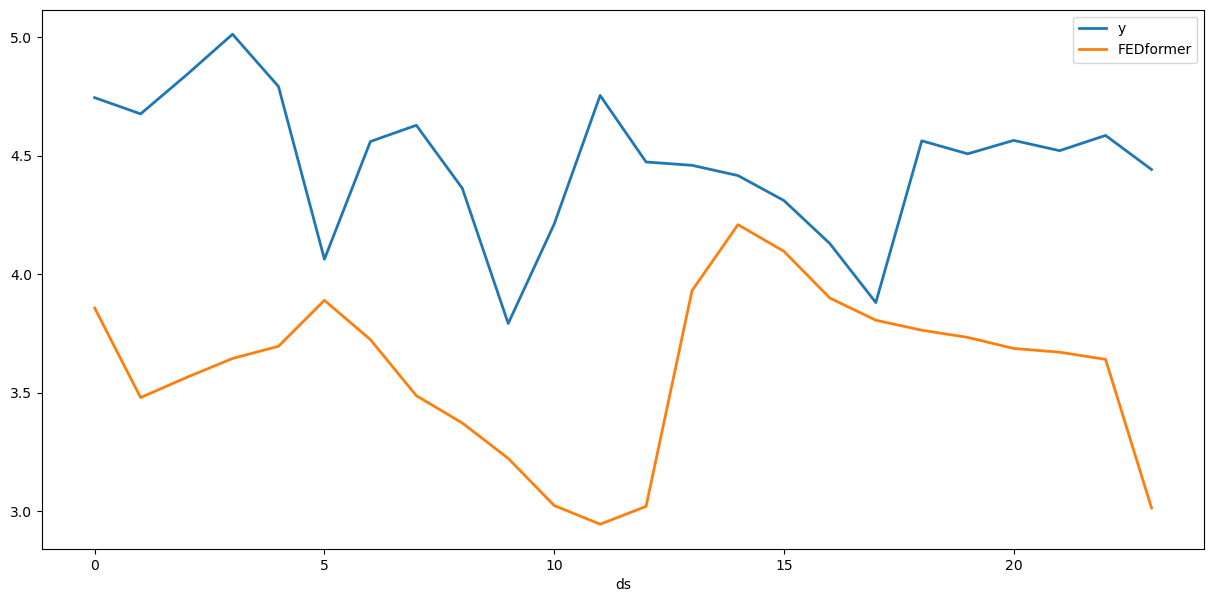

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,3.856623
1,3.478756
2,3.563902
3,3.643713
4,3.695378
5,3.889370
6,3.723527
7,3.486768
8,3.371554


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.872
FEDformer MSE: 0.965


## Horizon 36

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:930,:]
Y_test_df = Y_df.iloc[930:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,930,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,931,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,932,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,933,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,934,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,935,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,936,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,937,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,938,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,939,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
horizon = 36
model = FEDformer(h=horizon, input_size=12,
               max_steps=80,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 161 K 
7 | decoder       | Decoder       | 227 K 
------------------------------------------------
388 K     Trainable params
0         Non-trainable params
388 K     Total params
1.555     Total

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=80` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,3.123105
OT,1,3.099973
OT,2,3.131886
OT,3,3.186697
OT,4,3.246264
OT,5,3.305937
OT,6,3.335248
OT,7,3.324048
OT,8,3.377245


<Axes: xlabel='ds'>

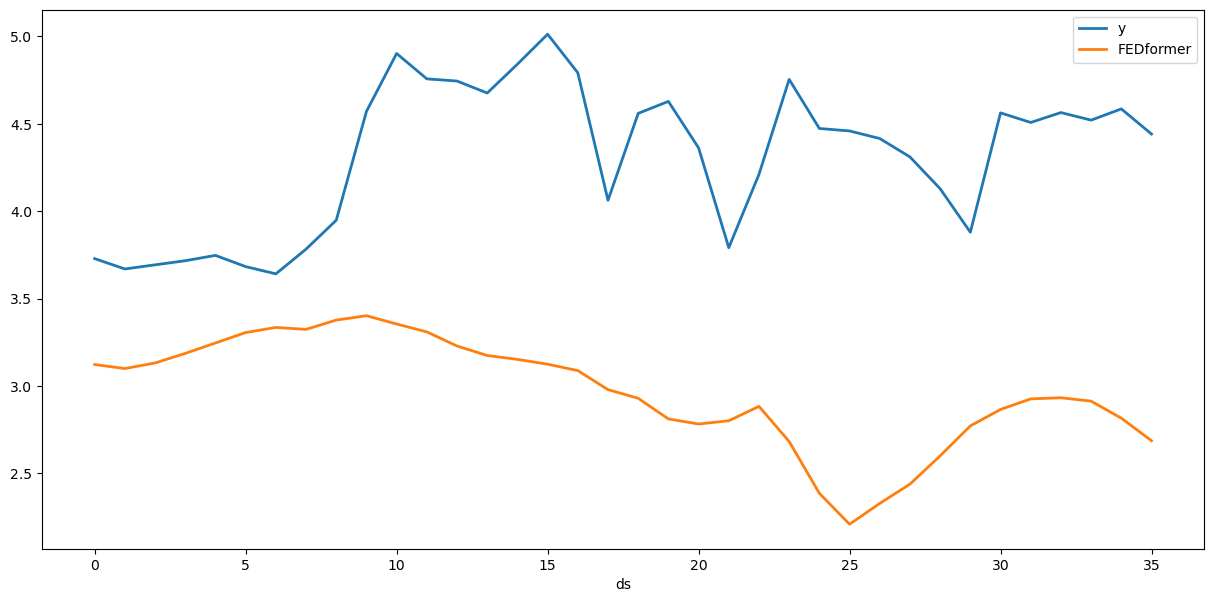

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,3.123105
1,3.099973
2,3.131886
3,3.186697
4,3.246264
5,3.305937
6,3.335248
7,3.324048
8,3.377245


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 1.345
FEDformer MSE: 2.122


## Horizon 48

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:918,:]
Y_test_df = Y_df.iloc[918:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,918,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,919,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,920,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,921,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,922,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,923,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,924,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,925,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,926,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,927,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
horizon = 48
model = FEDformer(h=horizon, input_size=24,
               max_steps=10,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 173 K 
7 | decoder       | Decoder       | 263 K 
------------------------------------------------
438 K     Trainable params
0         Non-trainable params
438 K     Total params
1.752     Total

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=10` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,4.031262
OT,1,4.201892
OT,2,3.985819
OT,3,3.906461
OT,4,3.912239
OT,5,3.949974
OT,6,3.916245
OT,7,3.919174
OT,8,3.838552


<Axes: xlabel='ds'>

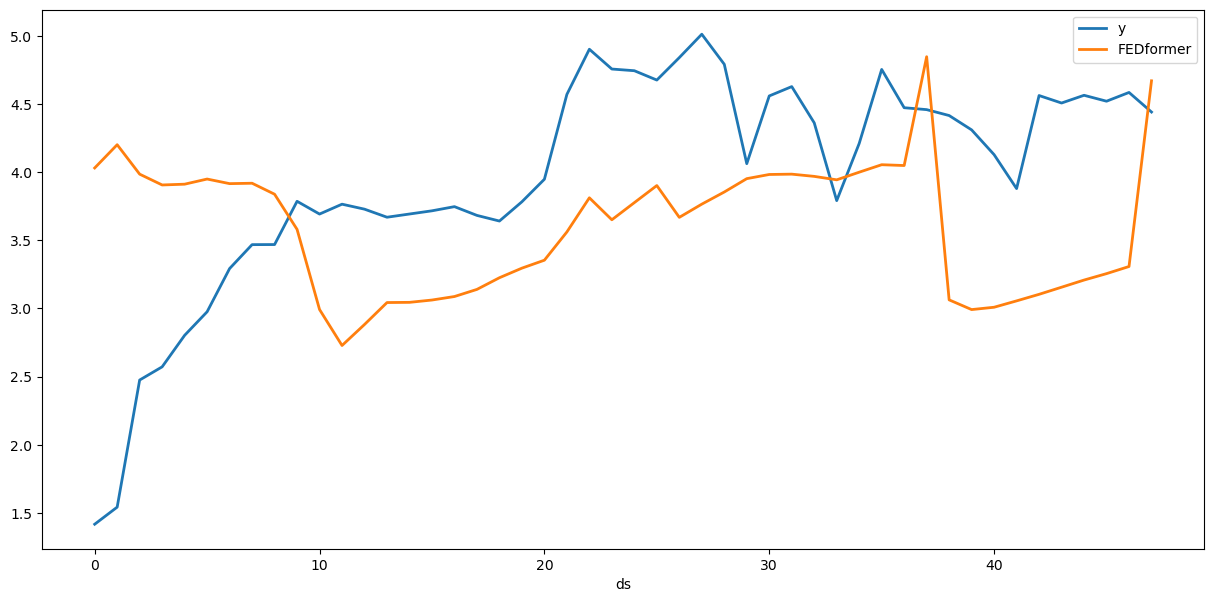

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,4.031262
1,4.201892
2,3.985819
3,3.906461
4,3.912239
5,3.949974
6,3.916245
7,3.919174
8,3.838552


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.886
FEDformer MSE: 1.065


## Horizon 60

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:908,:]
Y_test_df = Y_df.iloc[908:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,908,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,909,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,910,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,911,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,912,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,913,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,914,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,915,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,916,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,917,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
horizon = 60
model = FEDformer(h=horizon, input_size=24,
               max_steps=10,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 173 K 
7 | decoder       | Decoder       | 288 K 
------------------------------------------------
462 K     Trainable params
0         Non-trainable params
462 K     Total params
1.850     Total

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=10` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,3.741867
OT,1,3.665888
OT,2,3.575255
OT,3,3.581936
OT,4,3.742142
OT,5,3.748054
OT,6,3.709908
OT,7,3.731282
OT,8,3.883732


<Axes: xlabel='ds'>

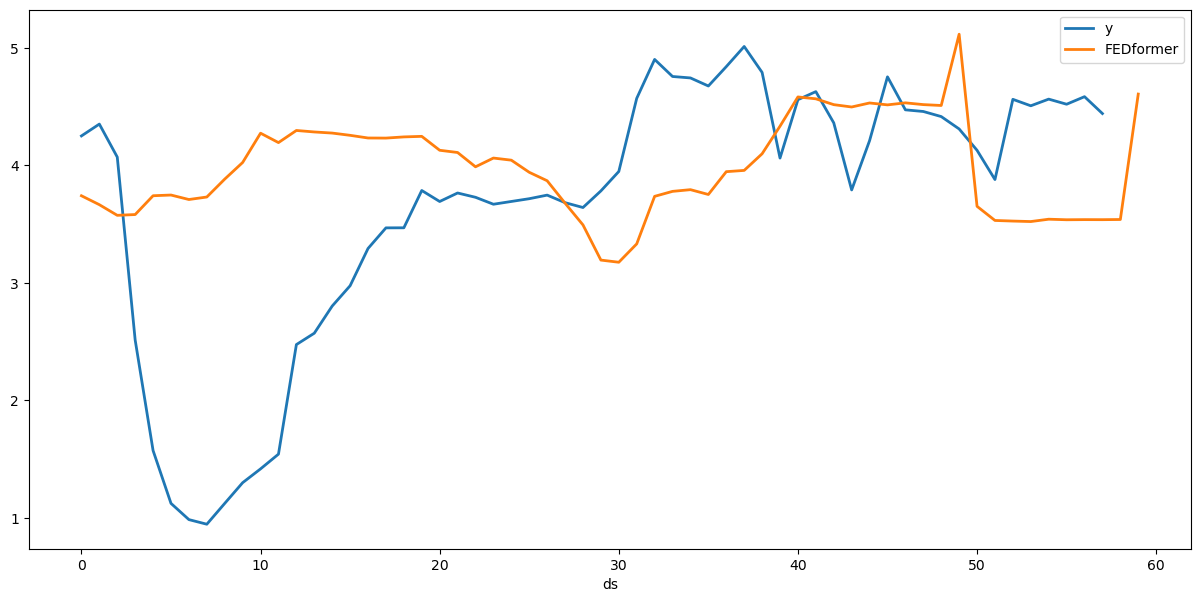

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,3.741867
1,3.665888
2,3.575255
3,3.581936
4,3.742142
5,3.748054
6,3.709908
7,3.731282
8,3.883732


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.939
FEDformer MSE: 1.533
